# LAB 4 : Implement Decision tree algorithm for classification

In [172]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [173]:
# import dataset
dataset =  pd.read_csv('diabetes.csv')

## EDA Steps

In [174]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [175]:
# Dimension of dataset
dataset.shape

(768, 9)

In [176]:
# Attributes in dataset
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [177]:
# information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [178]:
# Description of dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Preprocessing Steps

In [179]:
# Selecting data using iloc based on integer positions
X = dataset.iloc[:,:-1]

# Selecting data using loc based on labels
Y = dataset.iloc[:,-1]

In [180]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [181]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Splitting the dataset into the Training set and Test set

In [182]:
# splitting Data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                    test_size = 0.25,
                                    random_state = 0)

In [183]:
print(X_train.shape)
print(X_test.shape)

(576, 8)
(192, 8)


### Feature Scaling

In [184]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [185]:
print(X_test)

[[-0.89466499  2.40832035  0.42614323 ...  1.5176708   2.78154275
  -0.93394179]
 [-0.58177669 -0.40019425  0.32738704 ...  0.29631107 -0.23748131
  -0.84250027]
 [ 0.04399992 -1.34654156 -0.26515007 ...  0.34884267 -0.27712506
  -0.65961722]
 ...
 [-0.89466499 -0.33913959 -0.36390625 ... -0.78058677  1.41840764
  -1.02538331]
 [-0.26888838  0.24087973  0.52489941 ... -1.34530148 -0.65221593
   2.08362842]
 [ 0.35688822 -0.98021357  0.52489941 ... -0.49166296 -0.68271112
   0.43768103]]


### Train the Decision Tree Classification model on the Training set

In [186]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion = 'gini',
    random_state= 3,
    max_depth = 5,
    splitter = 'random')

classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=3, splitter='random')

#### Predicting the Test set results

In [187]:
ypred = classifier.predict(X_test)

#### Compare the predicted and Actual Output

In [188]:
print(np.concatenate((ypred.reshape(len(ypred),1),
                      y_test.reshape(len(y_test),1)),
                     1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

### Making the Confusion Matrix

In [189]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, ypred)
print(cm)

[[115  15]
 [ 30  32]]


In [190]:
# Accuracy of model
print("Accuracy =",(115+32)/192*100)

Accuracy = 76.5625


#### Build the Classification Report

In [191]:
from sklearn.metrics import classification_report

print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       130
           1       0.68      0.52      0.59        62

    accuracy                           0.77       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.76      0.77      0.76       192



## Visualising the Training set results

#### VISUALIZE TEXT REPRESENTATION

In [194]:
from sklearn import tree
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_1 <= -0.15
|   |--- feature_0 <= 0.51
|   |   |--- feature_7 <= -0.62
|   |   |   |--- feature_3 <= -0.17
|   |   |   |   |--- feature_7 <= -0.92
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  -0.92
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  -0.17
|   |   |   |   |--- feature_5 <= -0.42
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  -0.42
|   |   |   |   |   |--- class: 0
|   |   |--- feature_7 >  -0.62
|   |   |   |--- feature_1 <= -0.46
|   |   |   |   |--- feature_1 <= -3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  -3.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -0.46
|   |   |   |   |--- feature_0 <= -0.69
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  -0.69
|   |   |   |   |   |--- class: 0
|   |--- feature_0 >  0.51
|   |   |--- feature_6 <= 1.17
|   |   |   |--- feature_4 <= 0.97
|   |   |   |   |--- feature_1 <= -3.31
|   |   |   |   

### Visualize the tree

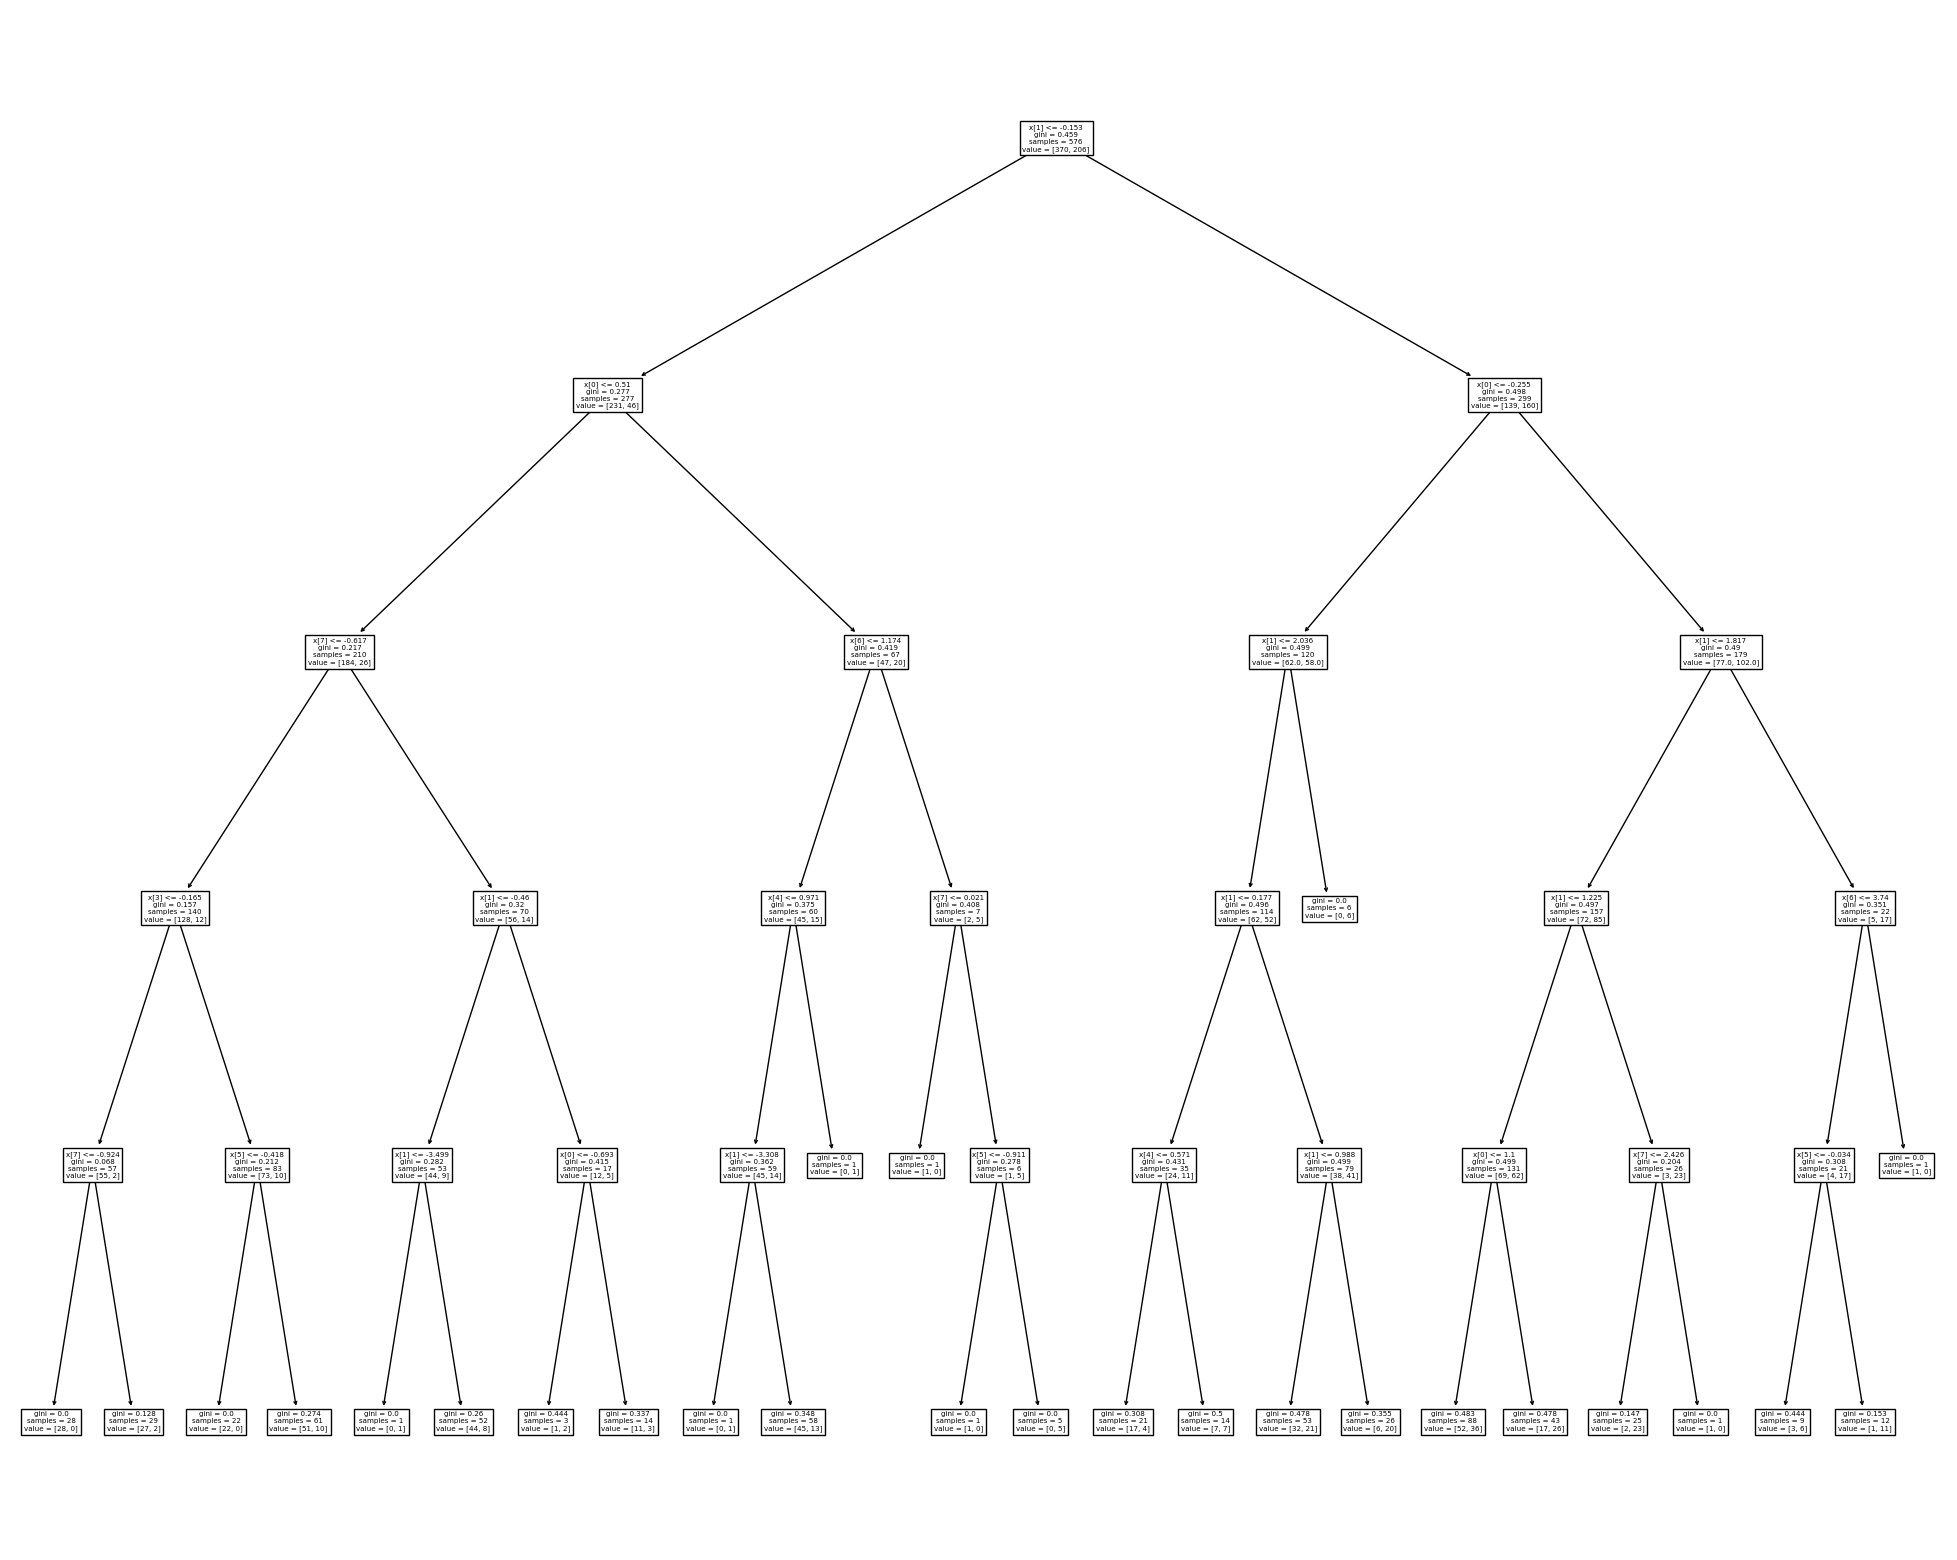

In [193]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier)
plt.show()